In [1]:
from pathlib import Path
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from spectral import *
import spectral.io.envi as envi
import wx
from typing import Callable
from IPython.display import display
import ipywidgets as widgets
from ipywidgets import interact, fixed
from functools import partial

os.environ['PYSPY_USE_WX'] = 'True'

np.set_printoptions(linewidth=1900)
pd.set_option('display.max_rows', 1900)
pd.set_option('display.max_columns', 1900)
pd.set_option('display.width', 1900)


In [2]:
def load_data(main_folder: str, fruit: str) -> pd.DataFrame:
    absolute = main_folder

    all_folders = os.listdir(absolute)

    data = dict(day=[], fruit=[], hdr=[], bin=[])
    for folder in all_folders:
        data_paths = os.listdir(absolute / folder)
        day_label = folder.replace("_m3", "")

        for path in data_paths:
            extension = path.split(".")[1]
            if extension == "bin":
                continue
            
            prefix = absolute / folder
            data["day"].append(day_label)
            data["fruit"].append(fruit)
            data["hdr"].append(prefix / path)
            data["bin"].append(prefix / data_paths[data_paths.index(path.replace(".hdr", ".bin"))])

    return pd.DataFrame.from_dict(data)


def get_image_min_max(img: np.array):
    print(f"Max band value {np.max(img)}, Min band value {np.min(img)}")
    return img


def read_image(hdr, bin_, image_transforms: list[Callable] | None = None):
    # hdr, bin_ = df.iloc[idx].hdr, df.iloc[idx].bin
    img = envi.open(hdr, image=bin_).load()

    if image_transforms is not None and len(image_transforms) != 0:
        for transform in image_transforms:
            img = transform(img)
    
    return img
    

In [3]:
oobx_dir = Path('../fruits_dataset')

fruit = 'Avocado'

path = oobx_dir / fruit / 'VIS'

anno_path = oobx_dir / 'annotations'
val_json = anno_path / 'val_v2.json'

In [4]:
avocado = load_data(path, "avocado")
avocado.head(10)

,day,fruit,hdr,bin
0,day_m2_10,avocado,../fruits_dataset/Avocado/VIS/day_m2_10/avocad...,../fruits_dataset/Avocado/VIS/day_m2_10/avocad...
1,day_m2_10,avocado,../fruits_dataset/Avocado/VIS/day_m2_10/avocad...,../fruits_dataset/Avocado/VIS/day_m2_10/avocad...
2,day_m2_10,avocado,../fruits_dataset/Avocado/VIS/day_m2_10/avocad...,../fruits_dataset/Avocado/VIS/day_m2_10/avocad...
3,day_m2_10,avocado,../fruits_dataset/Avocado/VIS/day_m2_10/avocad...,../fruits_dataset/Avocado/VIS/day_m2_10/avocad...
4,day_m2_10,avocado,../fruits_dataset/Avocado/VIS/day_m2_10/avocad...,../fruits_dataset/Avocado/VIS/day_m2_10/avocad...
5,day_m2_05,avocado,../fruits_dataset/Avocado/VIS/day_m2_05/avocad...,../fruits_dataset/Avocado/VIS/day_m2_05/avocad...
6,day_m2_05,avocado,../fruits_dataset/Avocado/VIS/day_m2_05/avocad...,../fruits_dataset/Avocado/VIS/day_m2_05/avocad...
7,day_m2_05,avocado,../fruits_dataset/Avocado/VIS/day_m2_05/avocad...,../fruits_dataset/Avocado/VIS/day_m2_05/avocad...
8,day_m2_05,avocado,../fruits_dataset/Avocado/VIS/day_m2_05/avocad...,../fruits_dataset/Avocado/VIS/day_m2_05/avocad...
9,day_m2_05,avocado,../fruits_dataset/Avocado/VIS/day_m2_05/avocad...,../fruits_dataset/Avocado/VIS/day_m2_05/avocad...


In [5]:
paths = load_data(path, 'avocado')
df = pd.DataFrame.from_dict(paths)
df.head()

,day,fruit,hdr,bin
0,day_m2_10,avocado,../fruits_dataset/Avocado/VIS/day_m2_10/avocad...,../fruits_dataset/Avocado/VIS/day_m2_10/avocad...
1,day_m2_10,avocado,../fruits_dataset/Avocado/VIS/day_m2_10/avocad...,../fruits_dataset/Avocado/VIS/day_m2_10/avocad...
2,day_m2_10,avocado,../fruits_dataset/Avocado/VIS/day_m2_10/avocad...,../fruits_dataset/Avocado/VIS/day_m2_10/avocad...
3,day_m2_10,avocado,../fruits_dataset/Avocado/VIS/day_m2_10/avocad...,../fruits_dataset/Avocado/VIS/day_m2_10/avocad...
4,day_m2_10,avocado,../fruits_dataset/Avocado/VIS/day_m2_10/avocad...,../fruits_dataset/Avocado/VIS/day_m2_10/avocad...


In [6]:
# day_01 = read_image(46, [get_image_min_max])
day_01 = read_image(df.iloc[5].hdr, df.iloc[5].bin, [get_image_min_max])

Max band value 0.9498608708381653, Min band value -0.12919457256793976


/home/oobx/Desktop/PROJEKTY/SIiUM/env/lib/python3.12/site-packages/spectral/graphics/spypylab.py:796: UserWarning: Failed to create RectangleSelector object. Interactive pixel class labeling will be unavailable.
  warnings.warn(msg)


ImageView object:
  Display bands       :  [22, 59, 20]
  Interpolation       :  <default>
  RGB data limits     :
    R: [-0.0024752411991357803, 0.10712845623493195]
    G: [0.0, 0.09738902747631073]
    B: [-0.003420458873733878, 0.11718939244747162]

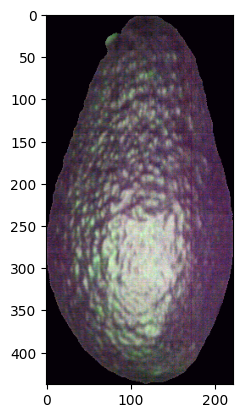

In [7]:
imshow(day_01[:, :], bands=[22, 59, 20])

ImageView object:
  Display bands       :  (0, 112, 223)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.054054006934165955, 0.284280925989151]
    G: [0.09423213452100754, 0.168155699968338]
    B: [0.5339781641960144, 0.6455080509185791]

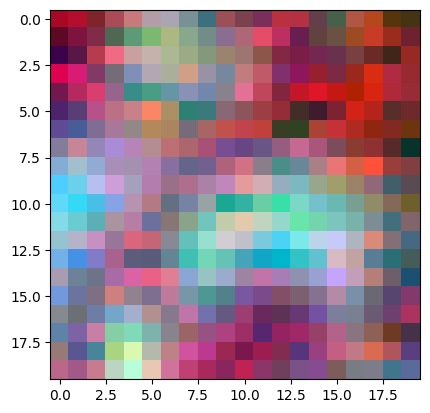

In [8]:
imshow(day_01[200:220, 100:120], bands=(0, 112, 223))

ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 0.1105252057313919]
    G: [0.0, 0.1105252057313919]
    B: [0.0, 0.1105252057313919]

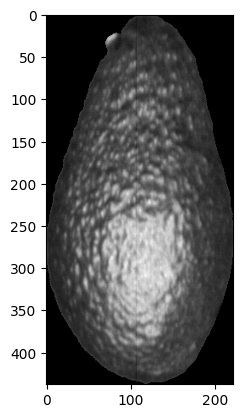

In [9]:
single_band = day_01[:, :, 98]
imshow(single_band)

In [10]:

def find_closest_wavelenght(wavelength, marks, tol=3):
    """ `tol` tolerance in nanometers"""
    marks = np.array(marks)
    if pd.isna(wavelength):
        return None
        
    rng = marks[np.logical_and(wavelength >= marks - tol, wavelength <= marks + tol)]
    if len(rng) > 0:
        return marks[np.where(marks == rng[0])[0].astype('uint8')[0]]
    # return '-'
    
    
def display_band(img, index):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(22, 6))
    ax1.imshow(img[:, :, index])
    ax1.set_title(f'Band {index}')
    
    ax2.hist(img[:, :, index].ravel(), bins=256)
    ax2.set_title('Pixel Intensity Histogram')

    h, w = round(img.shape[0] / 2), round(img.shape[1] / 2)
    ax3.plot(img[h, w])
    ax3.set_title('Middle pixel')
    
    plt.show()
    plt.close()


def display_(image):
    interact(display_band, img=fixed(image), index=(0, image.shape[2] - 1))



In [11]:
data = json.loads(val_json.read_text())
df = pd.json_normalize(data)

In [12]:
for item in df:
    print(item)

cameras
days
records
annotations
info.createdAt


In [13]:

df_combined = pd.DataFrame({
    'Specim wavelengths': dict(enumerate(df.cameras[0][0]['wavelengths'])),
    'Redeye wavelengths': dict(enumerate(df.cameras[0][1]['wavelengths'])),
    'Corning wavelengths':dict(enumerate(df.cameras[0][2]['wavelengths'])),
})

df_combined.head()

,Specim wavelengths,Redeye wavelengths,Corning wavelengths
0,397.66,919.6780,408.034
1,400.28,922.9758,410.023
2,402.90,926.2727,412.012
3,405.52,929.5688,414.001
4,408.13,932.8640,415.989


In [14]:
water_marks = [970, 1190, 1450, 1940]  # nanometry. z czasem woda odparowuje

df_combined['Water Specim'] = df_combined['Specim wavelengths'].apply(lambda x: find_closest_wavelenght(x, water_marks))
df_combined['Water Redeye'] = df_combined['Redeye wavelengths'].apply(lambda x: find_closest_wavelenght(x, water_marks))
df_combined['Water Corning'] = df_combined['Corning wavelengths'].apply(lambda x: find_closest_wavelenght(x, water_marks))


In [15]:
cell_walls = [1502, 1510, 1572, 1600]  # jak twardy jest owoc

df_combined['CellWall Specim'] = df_combined['Specim wavelengths'].apply(lambda x: find_closest_wavelenght(x, cell_walls))
df_combined['CellWall Redeye'] = df_combined['Redeye wavelengths'].apply(lambda x: find_closest_wavelenght(x, cell_walls))
df_combined['CellWall Corning'] = df_combined['Corning wavelengths'].apply(lambda x: find_closest_wavelenght(x, cell_walls))


In [16]:
organic_acids = [1720, 1745, 1760, 1820, 1880]  # poziom spada w trakcie dojrzewania

df_combined['OrganicAcids Specim'] = df_combined['Specim wavelengths'].apply(lambda x: find_closest_wavelenght(x, organic_acids))
df_combined['OrganicAcids Redeye'] = df_combined['Redeye wavelengths'].apply(lambda x: find_closest_wavelenght(x, organic_acids))
df_combined['OrganicAcids Corning'] = df_combined['Corning wavelengths'].apply(lambda x: find_closest_wavelenght(x, organic_acids))

In [17]:
starch_sugar = [1050]  # skrobia --> cukry, ważne! (w trakcie dojrzewania)

df_combined['StartchToSugar Specim'] = df_combined['Specim wavelengths'].apply(lambda x: find_closest_wavelenght(x, starch_sugar))
df_combined['StartchToSugar Redeye'] = df_combined['Redeye wavelengths'].apply(lambda x: find_closest_wavelenght(x, starch_sugar))
df_combined['StartchToSugar Corning'] = df_combined['Corning wavelengths'].apply(lambda x: find_closest_wavelenght(x, starch_sugar))

In [18]:
df_combined.index.name = 'Band'
df_combined = df_combined.dropna(how= "all", axis=1)
df_combined.fillna('-')

,Specim wavelengths,Redeye wavelengths,Corning wavelengths,Water Specim,Water Redeye,CellWall Redeye,OrganicAcids Redeye,StartchToSugar Redeye
Band,,,,,,,,
0,397.66,919.6780,408.034,-,-,-,-,-
1,400.28,922.9758,410.023,-,-,-,-,-
2,402.9,926.2727,412.012,-,-,-,-,-
3,405.52,929.5688,414.001,-,-,-,-,-
4,408.13,932.8640,415.989,-,-,-,-,-
5,410.75,936.1584,417.978,-,-,-,-,-
6,413.37,939.4520,419.967,-,-,-,-,-
7,416.0,942.7448,421.956,-,-,-,-,-
8,418.62,946.0367,423.945,-,-,-,-,-


In [19]:

watermark_specim = df_combined['Water Specim'].dropna().index.to_list()
watermark_redeye = df_combined['Water Redeye'].dropna().index.to_list()
cell_wall_redeye = df_combined['CellWall Redeye'].dropna().index.to_list()
organic_acids_redeye = df_combined['OrganicAcids Redeye'].dropna().index.to_list()
startch_sugar_redeye = df_combined['StartchToSugar Redeye'].dropna().index.to_list()


In [20]:
print(f"""
Specim water idx: {watermark_specim}\n
Redeye water idx: {watermark_redeye}\n
CellWall Redeye idx: {cell_wall_redeye}\n
OrganicAcids Redeye idx: {organic_acids_redeye}\n
StartchToSugar Redeye idx: {startch_sugar_redeye}
""")


Specim water idx: [210, 211, 212]

Redeye water idx: [15, 16, 82, 83, 163, 164]

CellWall Redeye idx: [180, 182, 183, 202, 210, 211]

OrganicAcids Redeye idx: [248, 249]

StartchToSugar Redeye idx: [39, 40]



In [21]:
day_01 = envi.open('../fruits_dataset/Avocado/NIR/day_01/avocado_day_01_20_front.hdr',
                 '../fruits_dataset/Avocado/NIR/day_01/avocado_day_01_20_front.bin').load()
# img2 = read_image(df.iloc[46].hdr, df.iloc[46].bin, [get_image_min_max])

/home/oobx/Desktop/PROJEKTY/SIiUM/env/lib/python3.12/site-packages/spectral/graphics/spypylab.py:796: UserWarning: Failed to create RectangleSelector object. Interactive pixel class labeling will be unavailable.
  warnings.warn(msg)


ImageView object:
  Display bands       :  [0, 126, 251]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 0.9373403787612915]
    G: [0.0, 0.6311379075050354]
    B: [-0.6719995141029358, 0.7830685377120972]

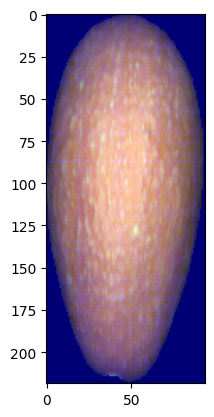

In [22]:
imshow(day_01)

In [23]:
display_(day_01)

interactive(children=(IntSlider(value=125, description='index', max=251), Output()), _dom_classes=('widget-int…

In [24]:
img3 = envi.open('../fruits_dataset/Avocado/NIR/day_10/avocado_day_10_01_front.hdr',
                 '../fruits_dataset/Avocado/NIR/day_10/avocado_day_10_01_front.bin').load()

In [25]:
display_(img3)

interactive(children=(IntSlider(value=125, description='index', max=251), Output()), _dom_classes=('widget-int…